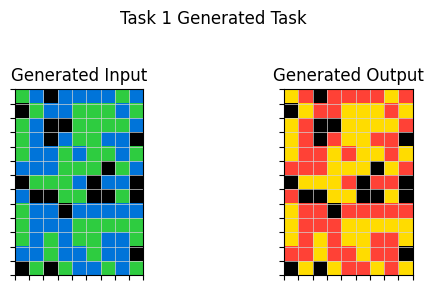

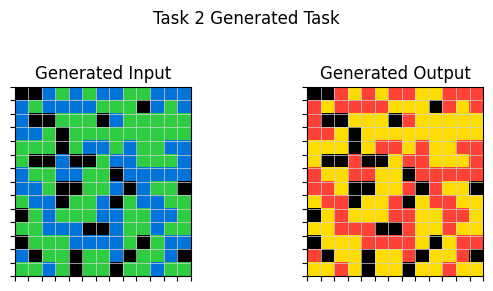

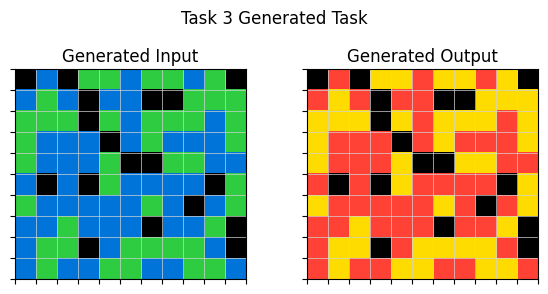

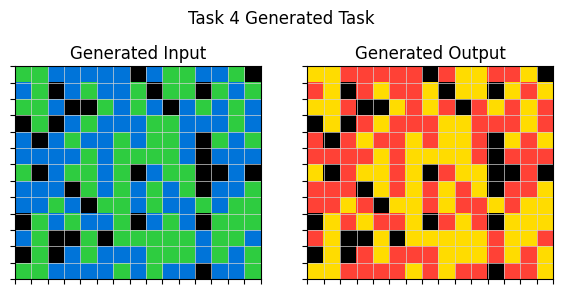

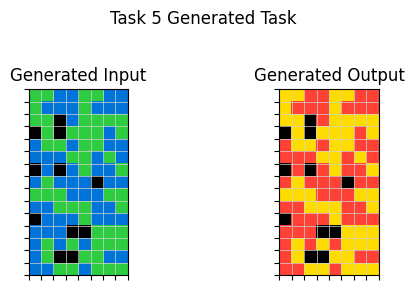

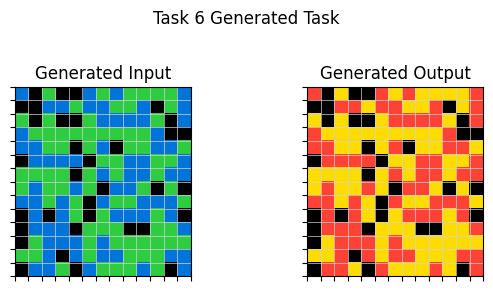

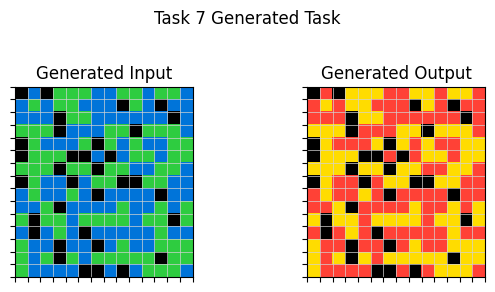

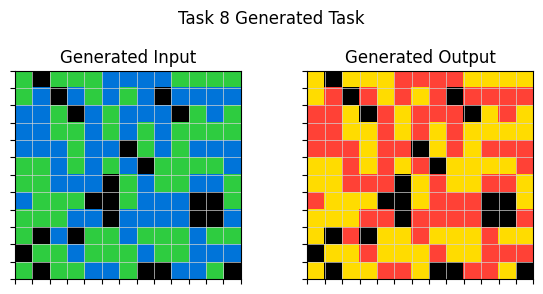

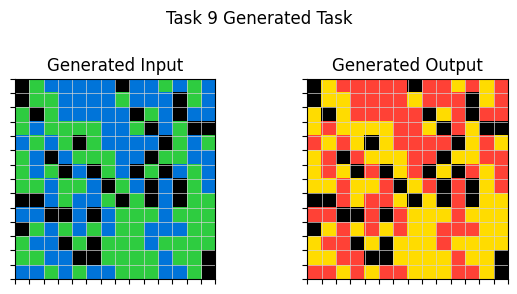

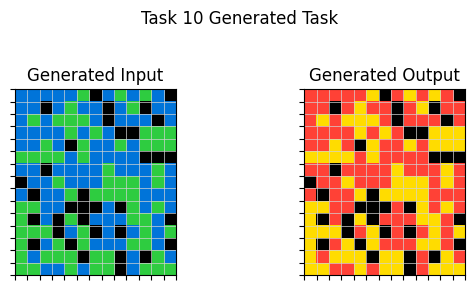

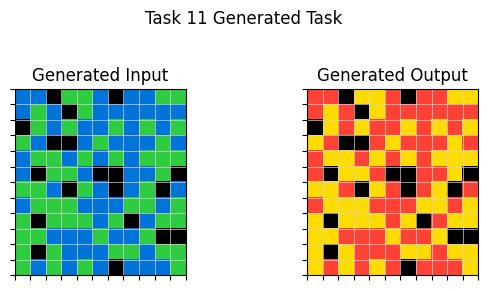

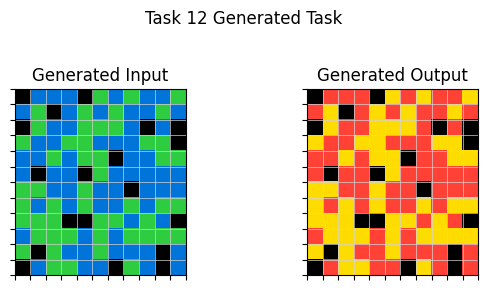

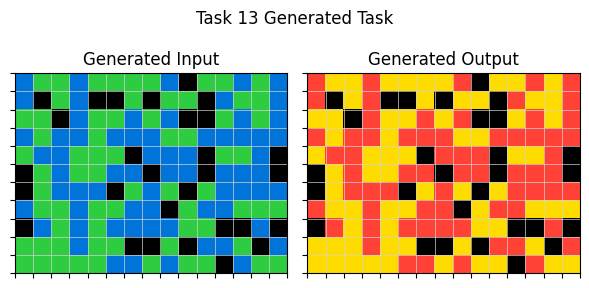

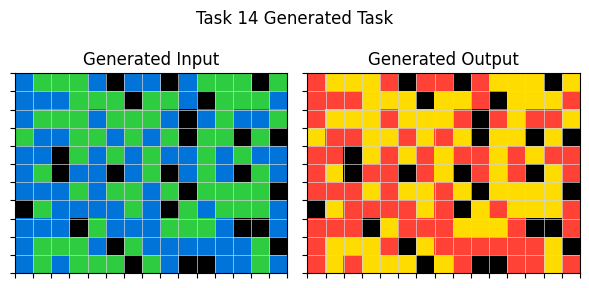

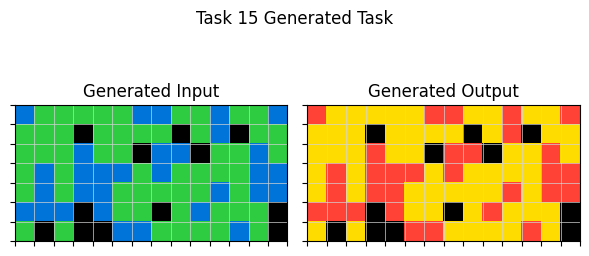

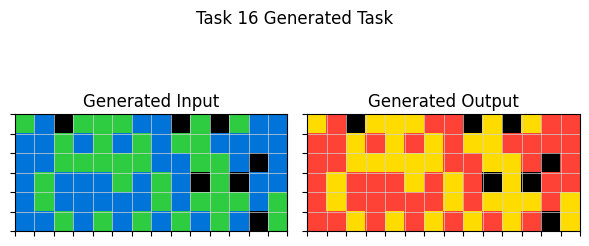

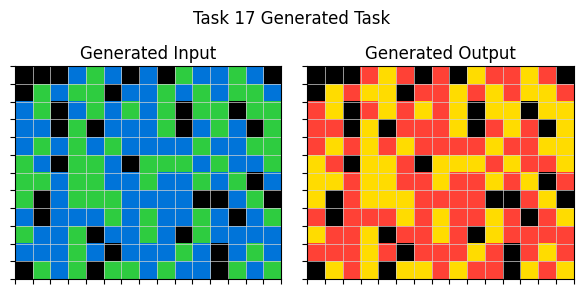

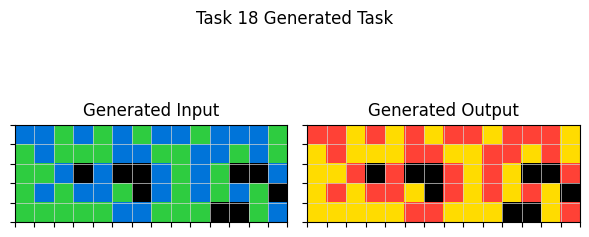

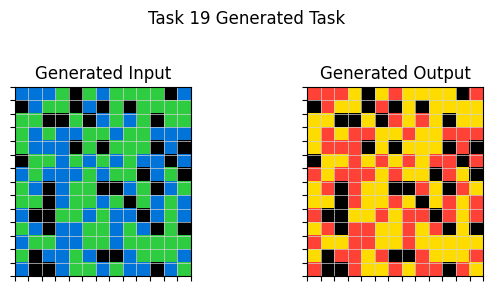

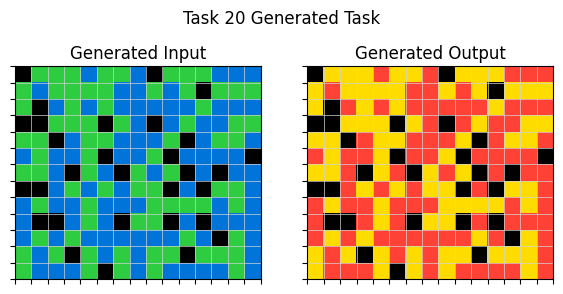

In [2]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Function to change color from old_color to new_color
def change_color(grid, old_color, new_color):
    new_grid = copy.deepcopy(grid)
    new_grid[grid == old_color] = new_color
    return new_grid

# Function to apply the color-changing rule (supports multiple colors)
def apply_color_change_rule(input_grid, color_pairs=[(1, 2), (3, 4)]):
    output_grid = copy.deepcopy(input_grid)
    for old_color, new_color in color_pairs:
        output_grid = change_color(output_grid, old_color, new_color)
    return output_grid

# Transformation functions (rotation, flipping)
def rotate_90(grid):
    return np.rot90(grid)

def flip_horizontal(grid):
    return np.fliplr(grid)

def flip_vertical(grid):
    return np.flipud(grid)

# Generate random grids with more variety
def generate_initial_population(num_individuals=10, min_size=5, max_size=15):
    population = []
    for _ in range(num_individuals):
        rows = random.randint(min_size, max_size)
        cols = random.randint(min_size, max_size)
        
        # Randomly choose the number of black (0) and color (1, 3) pixels
        num_colors = random.choice([1, 2])  # Use 1 or 2 different colors
        grid = np.zeros((rows, cols), dtype=int)
        
        # Place random pixels of color 1 and possibly 3
        for _ in range(random.randint(5, rows * cols // 4)):  # Randomly place color 1
            i, j = random.randint(0, rows - 1), random.randint(0, cols - 1)
            grid[i, j] = 1
        
        if num_colors == 2:
            for _ in range(random.randint(3, rows * cols // 6)):  # Randomly place color 3
                i, j = random.randint(0, rows - 1), random.randint(0, cols - 1)
                grid[i, j] = 3
        
        individual = {
            'input_grid': grid
        }
        
        # Apply multiple color change rules to the grid
        individual['output_grid'] = apply_color_change_rule(grid, color_pairs=[(1, 2), (3, 4)])
        population.append(individual)
    
    return population

# Fitness function to reward color changes
def fitness(individual):
    input_grid = individual['input_grid']
    expected_output = apply_color_change_rule(input_grid)
    
    # Count the number of correctly changed pixels (from 1 to 2, and 3 to 4)
    correctly_changed_pixels = np.sum((individual['output_grid'] == 2) & (input_grid == 1)) + \
                               np.sum((individual['output_grid'] == 4) & (input_grid == 3))
    
    # Reward the grids where more pixels were correctly changed
    fitness_score = correctly_changed_pixels * 10  # Reward correct transformations
    
    return fitness_score

# Select best individuals based on fitness
def select_best_individuals(population, num_best=5):
    sorted_population = sorted(population, key=lambda x: fitness(x), reverse=True)
    return sorted_population[:num_best]

# Crossover function to combine two parent grids
def crossover(parent1, parent2):
    rows1, cols1 = parent1['input_grid'].shape
    rows2, cols2 = parent2['input_grid'].shape
    
    # Crossover only if parents have the same grid size
    if rows1 == rows2 and cols1 == cols2:
        child_input = parent1['input_grid'].copy()
        crossover_point = random.randint(1, rows1 - 2)
        child_input[crossover_point:, :] = parent2['input_grid'][crossover_point:, :]
        child_output = apply_color_change_rule(child_input)
        return {'input_grid': child_input, 'output_grid': child_output}
    else:
        return random.choice([parent1, parent2])  # If sizes don't match, pick one parent

# Mutate the grid by randomly changing some pixels
def mutate(individual, mutation_rate=0.1):
    grid = individual['input_grid']
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if random.random() < mutation_rate:
                grid[i, j] = random.choice([0, 1, 3])  # Add mutation to black (0), color (1), or color (3)
    individual['output_grid'] = apply_color_change_rule(grid)
    return individual

# Main Genetic Algorithm Loop
def genetic_algorithm(num_generations=50, population_size=10, min_size=5, max_size=15):
    population = generate_initial_population(population_size, min_size, max_size)
    for generation in range(num_generations):
        best_individuals = select_best_individuals(population)
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(best_individuals, 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        population = new_population
    return select_best_individuals(population, num_best=1)[0]

# Visualization functions
def plot_one(ax, matrix, title):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    ax.imshow(matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)
    ax.set_xticks([x - 0.5 for x in range(1 + len(matrix[0]))])
    ax.set_yticks([x - 0.5 for x in range(1 + len(matrix))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title)

def plot_task(input_task, output_task, task_number):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    fig.suptitle(f'{task_number} Generated Task')
    plot_one(axs[0], input_task, 'Generated Input')
    plot_one(axs[1], output_task, 'Generated Output')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Generate 20 new tasks with more variety and visualize them
new_tasks = []
for i in range(20):  # Generate 20 tasks
    best_individual = genetic_algorithm(num_generations=50, population_size=10, min_size=5, max_size=15)
    generated_input = best_individual['input_grid']
    generated_output = best_individual['output_grid']
    plot_task(generated_input, generated_output, f"Task {i + 1}")
    new_tasks.append((generated_input, generated_output))


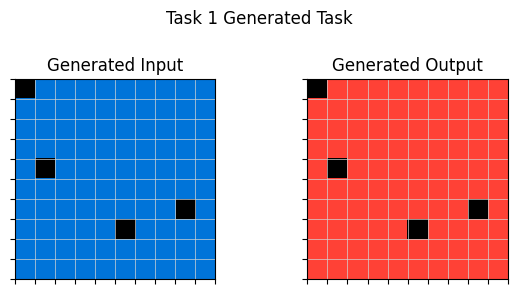

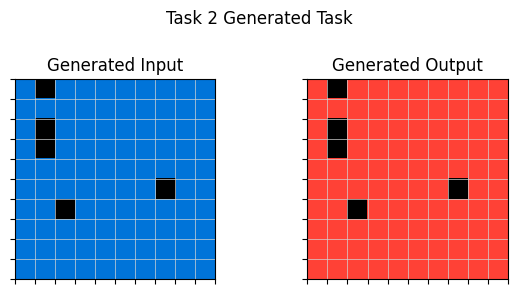

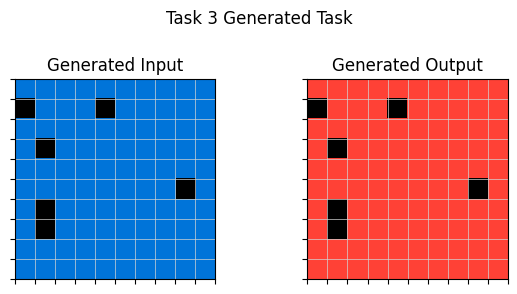

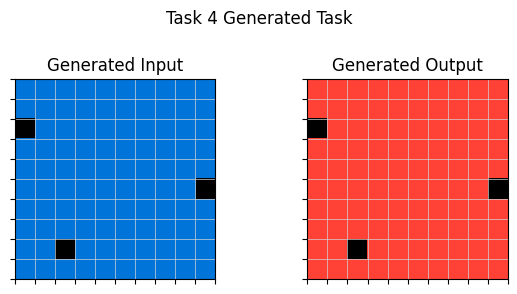

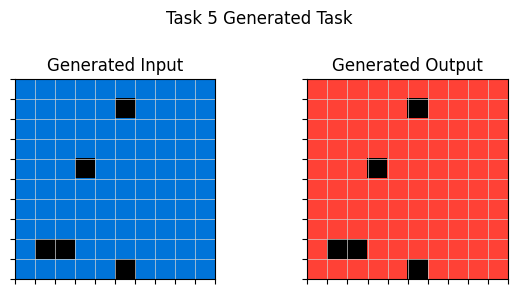

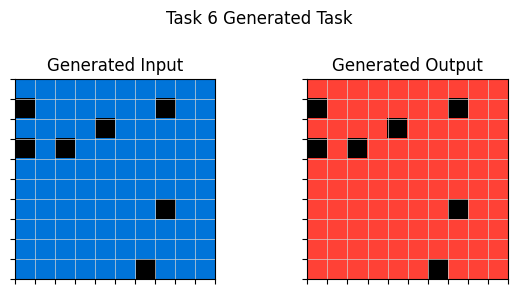

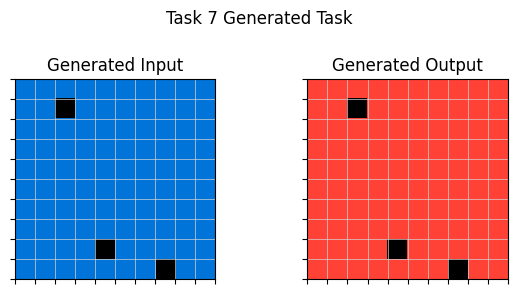

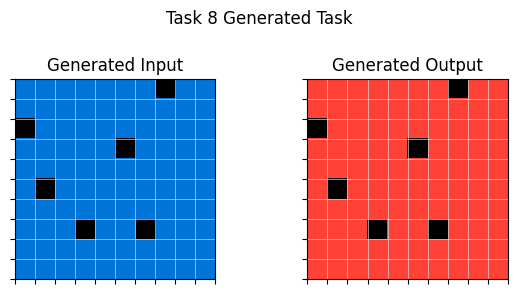

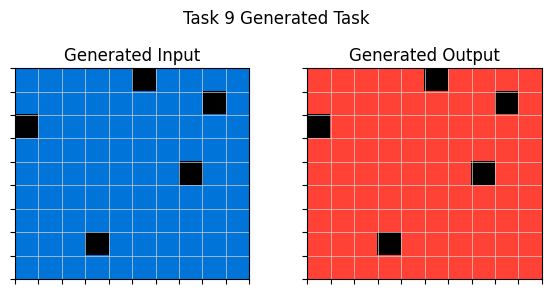

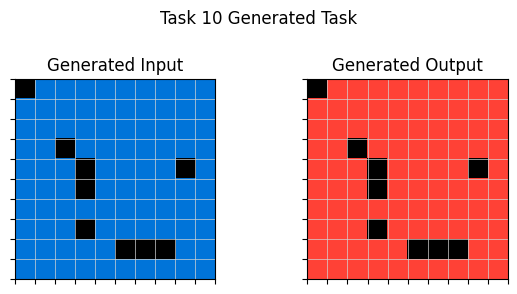

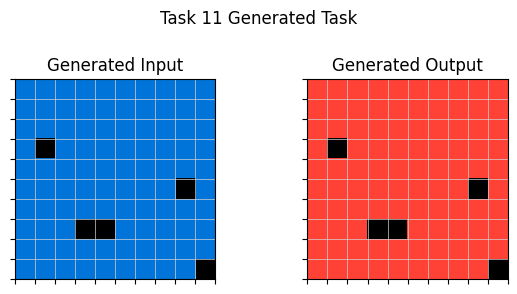

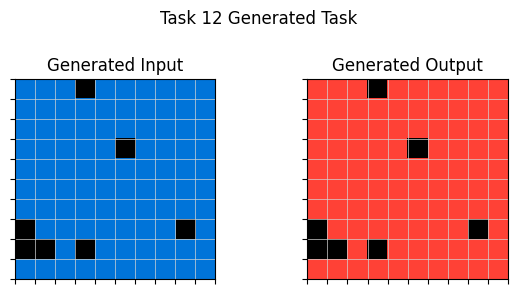

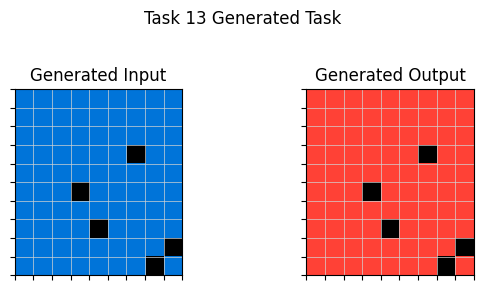

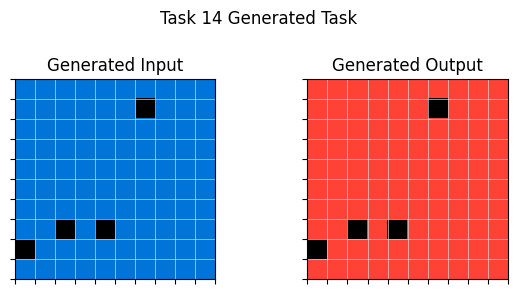

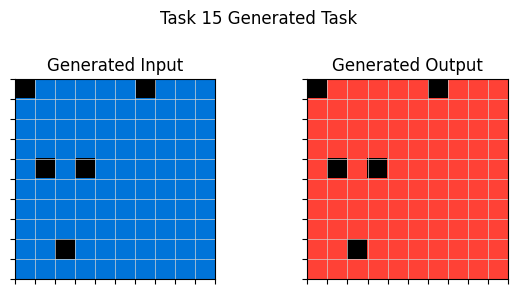

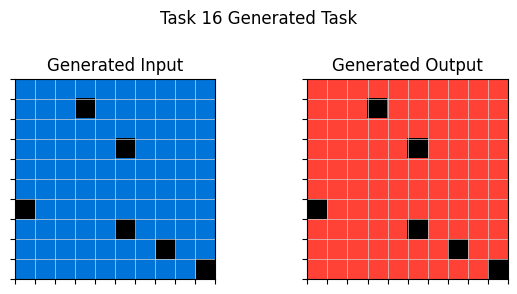

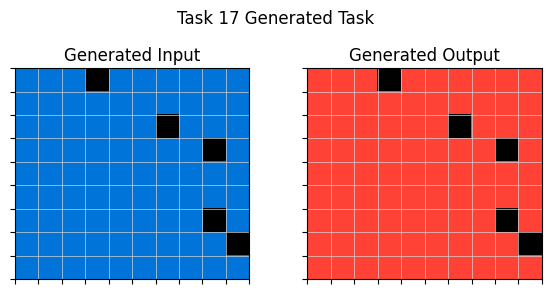

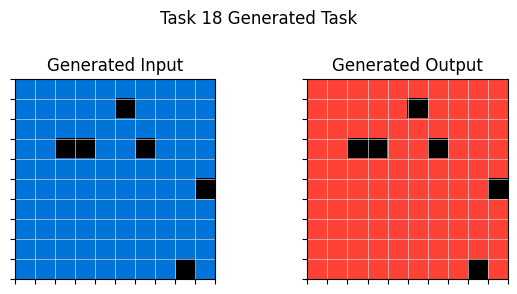

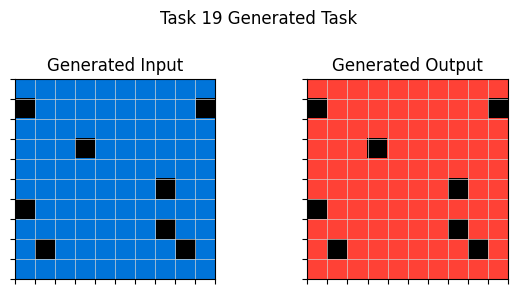

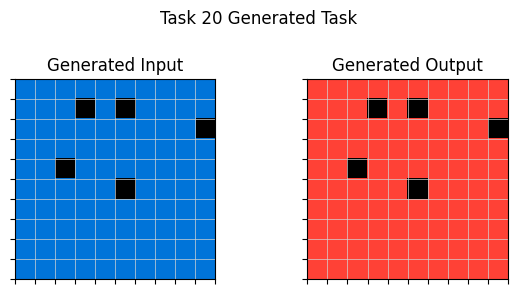

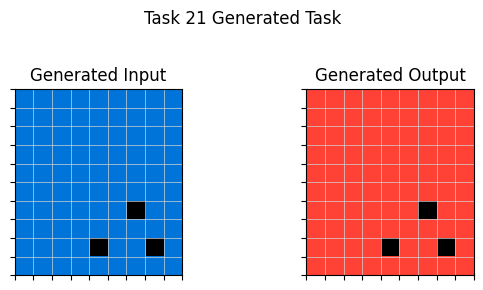

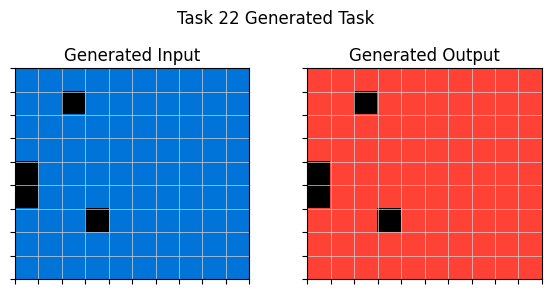

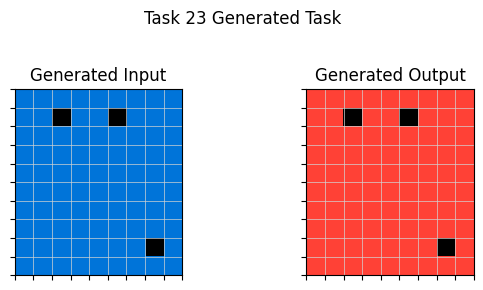

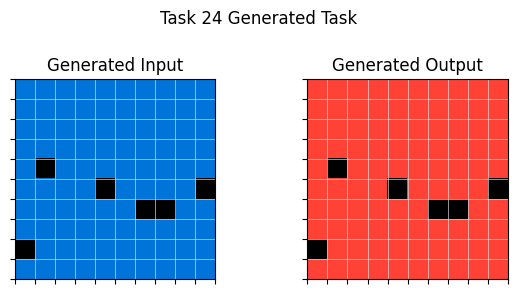

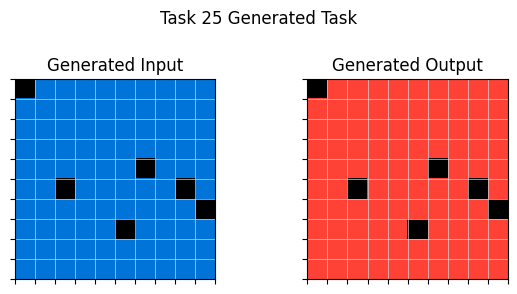

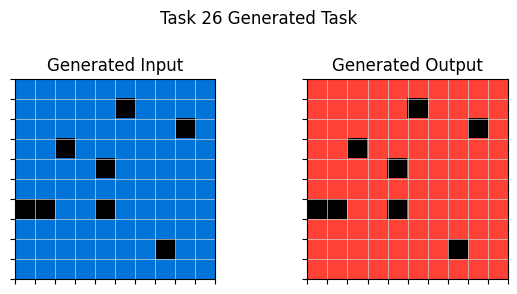

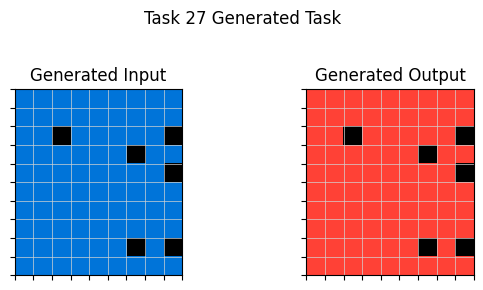

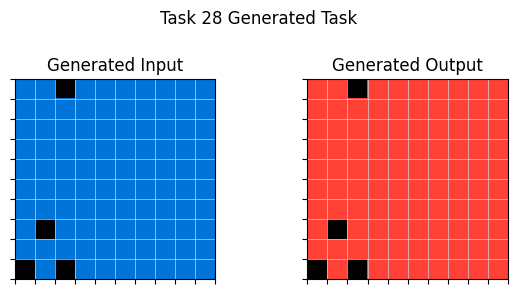

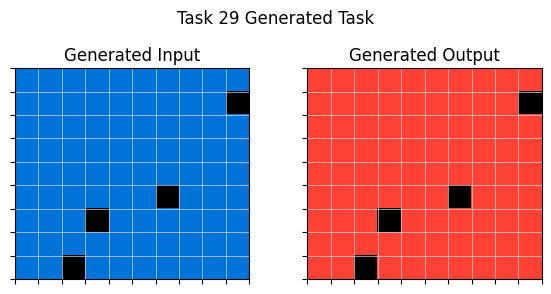

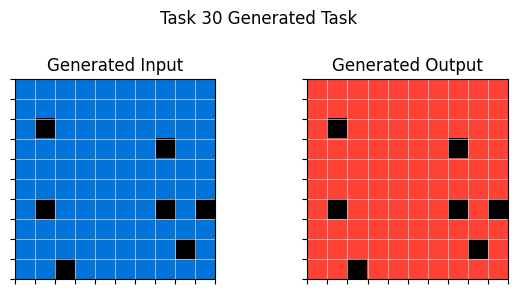

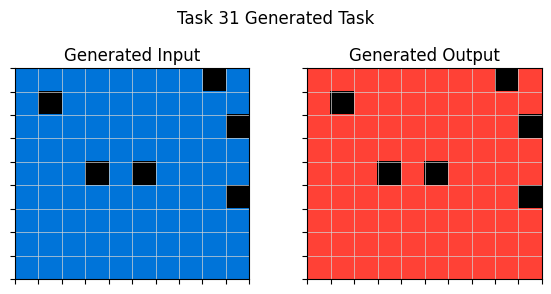

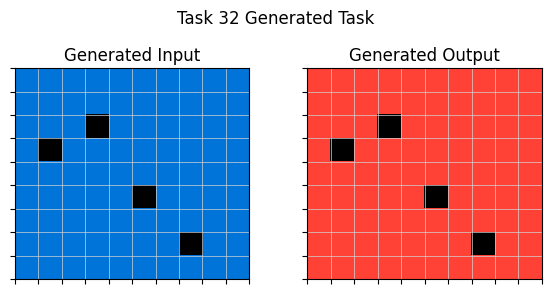

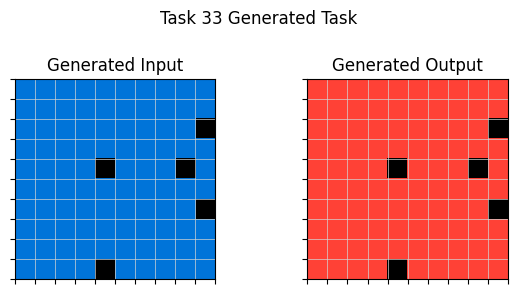

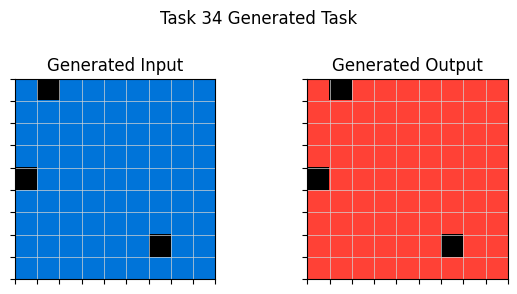

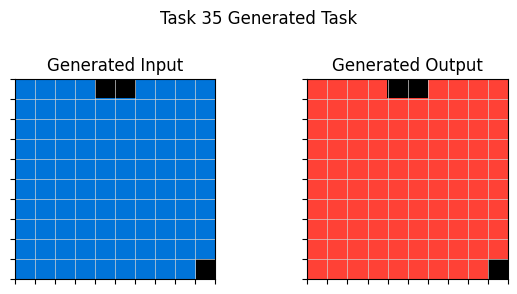

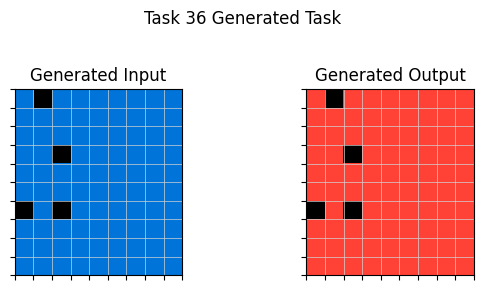

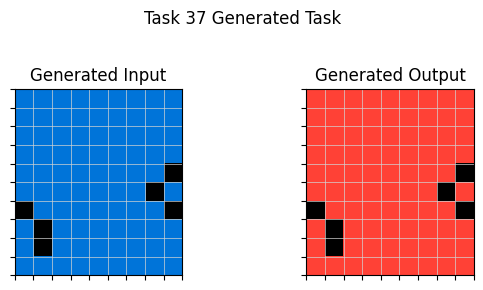

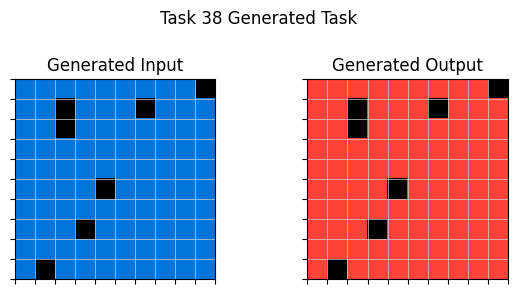

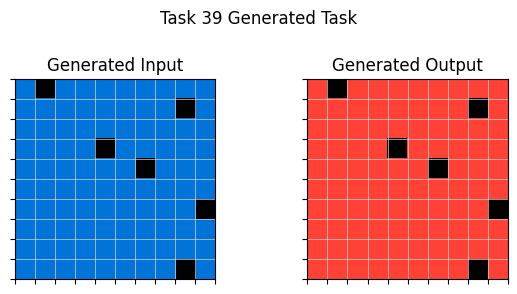

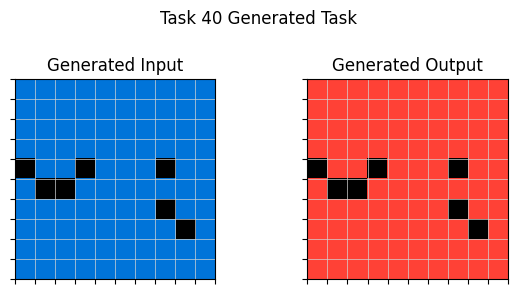

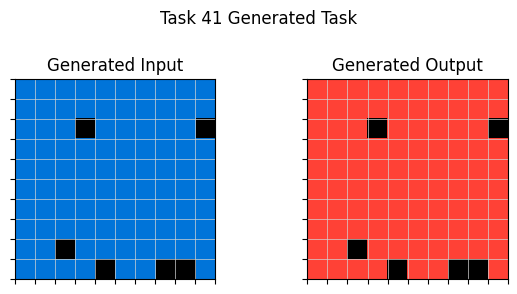

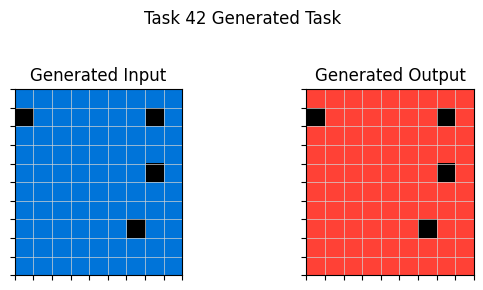

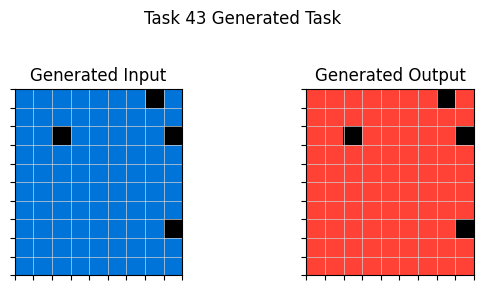

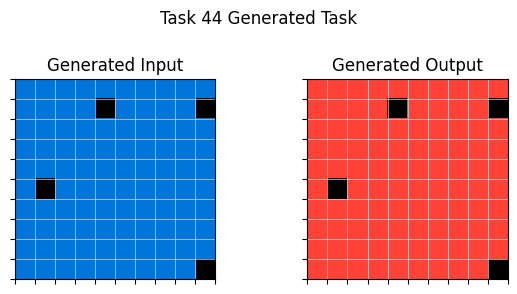

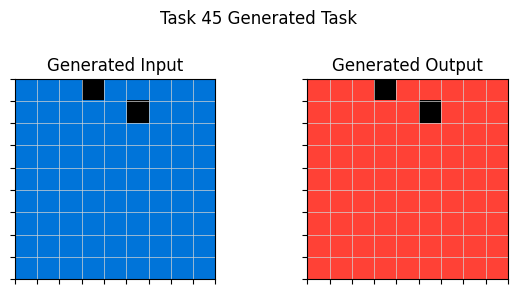

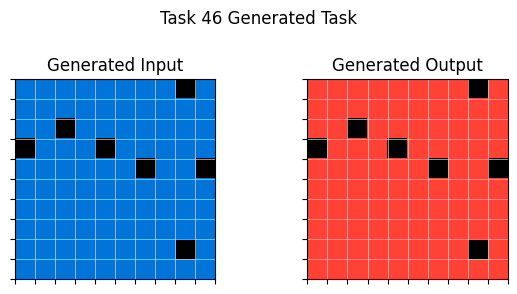

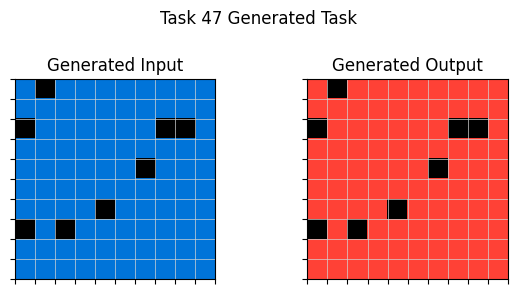

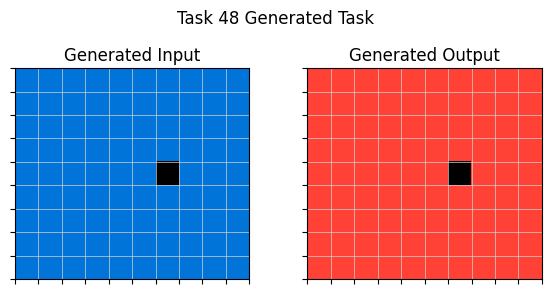

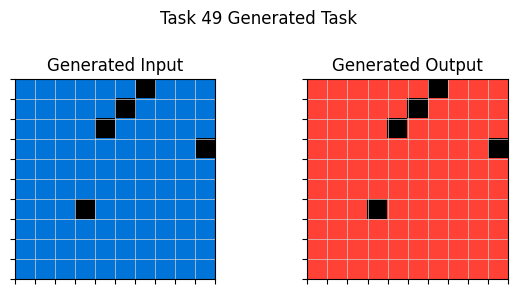

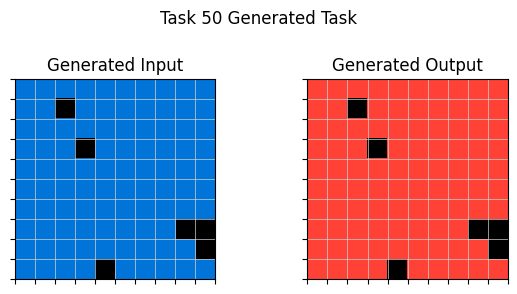

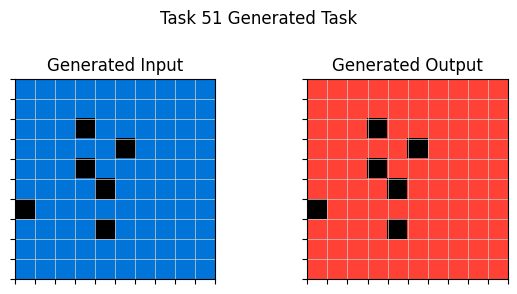

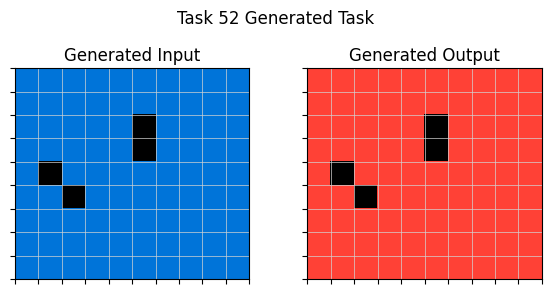

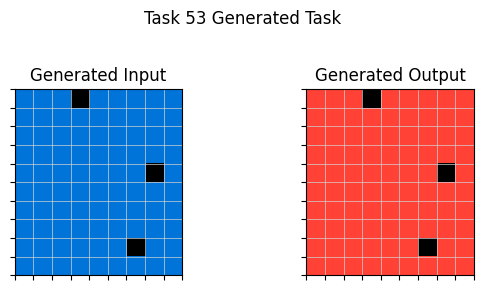

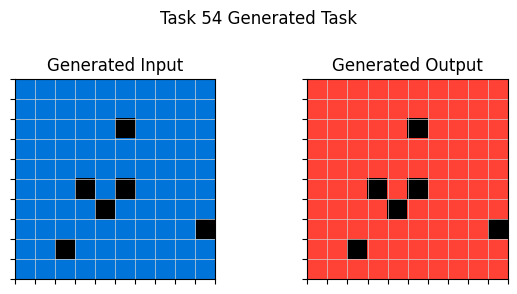

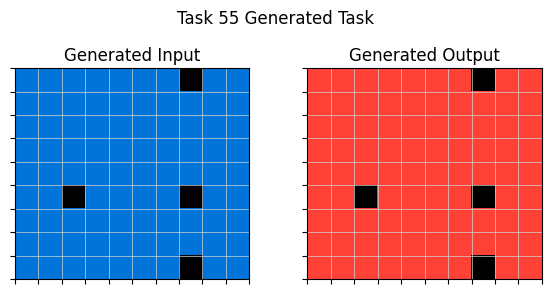

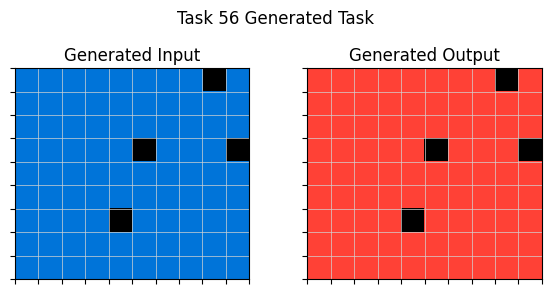

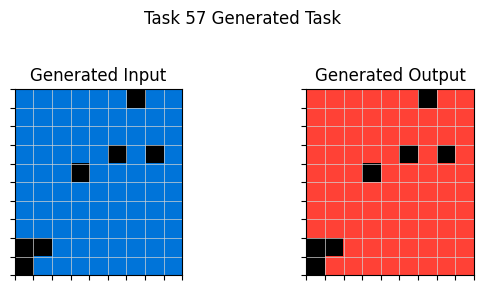

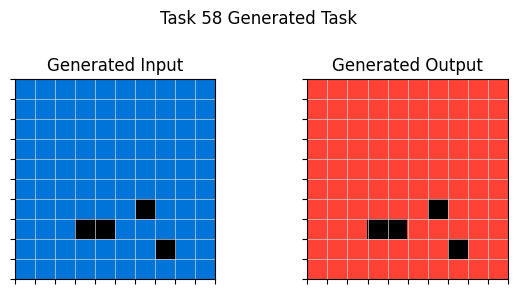

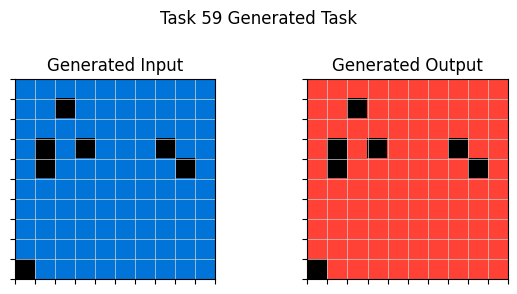

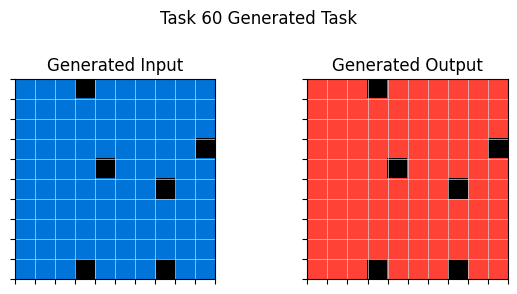

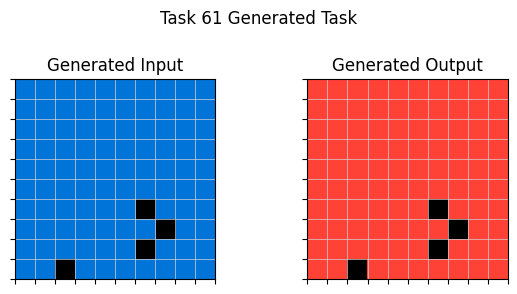

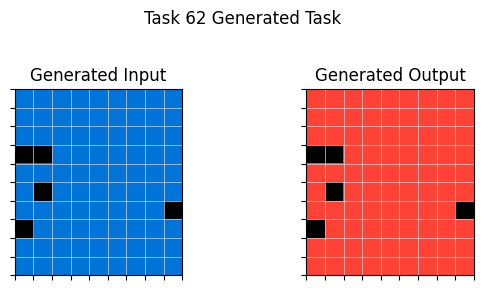

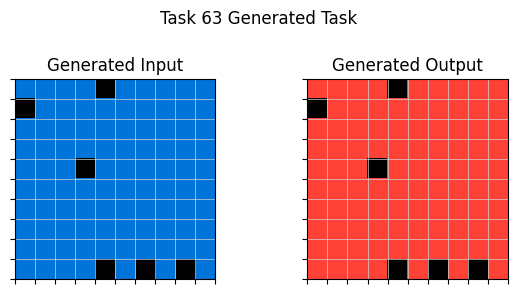

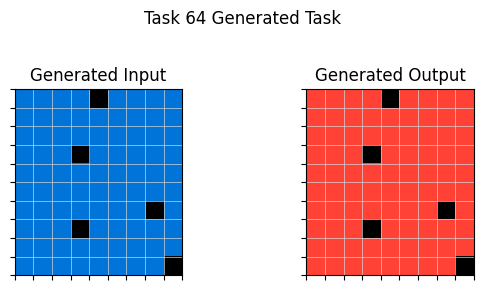

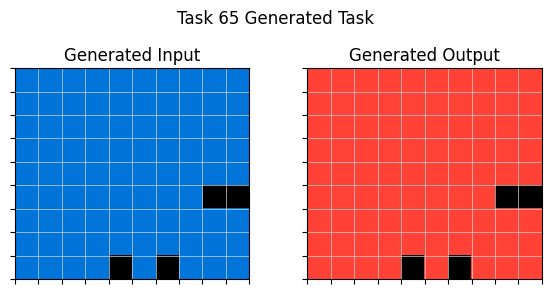

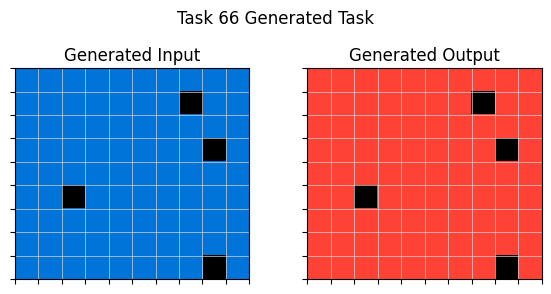

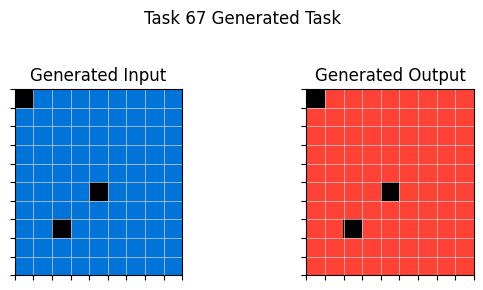

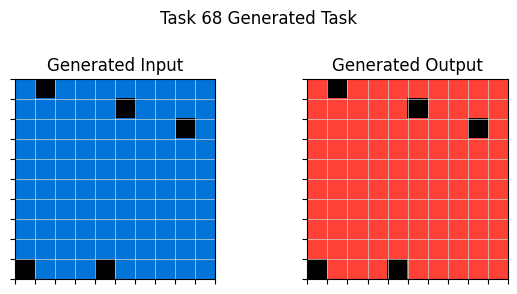

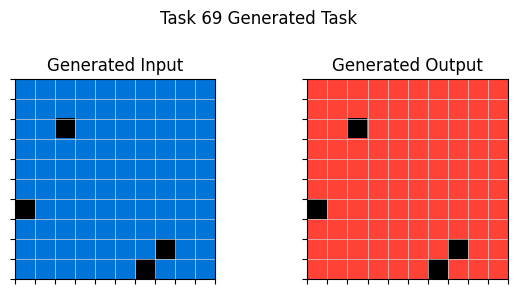

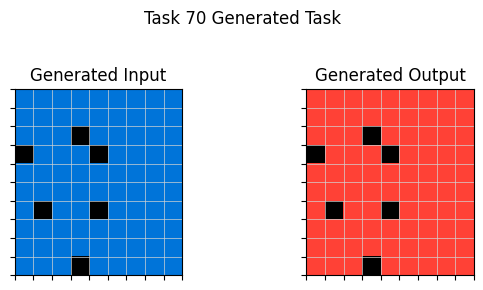

In [3]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Function to change color from old_color to new_color
def change_color(grid, old_color, new_color):
    new_grid = copy.deepcopy(grid)
    new_grid[grid == old_color] = new_color
    return new_grid

# Function to apply the color-changing rule
def apply_color_change_rule(input_grid, old_color=1, new_color=2):
    return change_color(input_grid, old_color, new_color)

# Transformation functions (rotation, flipping)
def rotate_90(grid):
    return np.rot90(grid)

def flip_horizontal(grid):
    return np.fliplr(grid)

def flip_vertical(grid):
    return np.flipud(grid)

# Generate the initial population of grids with random grid sizes
def generate_initial_population(num_individuals=10, min_size=5, max_size=10):
    population = []
    for _ in range(num_individuals):
        rows = random.randint(min_size, max_size)
        cols = random.randint(min_size, max_size)
        individual = {
            'input_grid': np.random.choice([0, 1], size=(rows, cols), p=[0.5, 0.5])  # Randomly generate 0 and 1
        }
        # Ensure each grid follows the color change rule
        individual['output_grid'] = apply_color_change_rule(individual['input_grid'])
        population.append(individual)
    return population

# Fitness function to encourage color changes
def fitness(individual):
    input_grid = individual['input_grid']
    expected_output = apply_color_change_rule(input_grid)
    
    # Count the number of correctly changed pixels (from 1 to 2)
    correctly_changed_pixels = np.sum((individual['output_grid'] == 2) & (input_grid == 1))
    
    # Reward the grids where more pixels were correctly changed
    fitness_score = correctly_changed_pixels * 10  # Reward correct transformations
    
    return fitness_score

# Select best individuals based on fitness
def select_best_individuals(population, num_best=5):
    sorted_population = sorted(population, key=lambda x: fitness(x), reverse=True)
    return sorted_population[:num_best]

# Crossover function to combine two parent grids
def crossover(parent1, parent2):
    rows1, cols1 = parent1['input_grid'].shape
    rows2, cols2 = parent2['input_grid'].shape
    
    # Crossover only if parents have the same grid size
    if rows1 == rows2 and cols1 == cols2:
        child_input = parent1['input_grid'].copy()
        crossover_point = random.randint(1, rows1 - 2)
        child_input[crossover_point:, :] = parent2['input_grid'][crossover_point:, :]
        child_output = apply_color_change_rule(child_input)
        return {'input_grid': child_input, 'output_grid': child_output}
    else:
        return random.choice([parent1, parent2])  # If sizes don't match, pick one parent

# Mutate the grid by randomly changing some pixels
def mutate(individual, mutation_rate=0.1):
    grid = individual['input_grid']
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if random.random() < mutation_rate:
                grid[i, j] = random.choice([0, 1])  # Change between black (0) and color (1)
    individual['output_grid'] = apply_color_change_rule(grid)
    return individual

# Main Genetic Algorithm Loop
def genetic_algorithm(num_generations=50, population_size=10, min_size=5, max_size=10):
    population = generate_initial_population(population_size, min_size, max_size)
    for generation in range(num_generations):
        best_individuals = select_best_individuals(population)
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(best_individuals, 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        population = new_population
    return select_best_individuals(population, num_best=1)[0]

# Visualization functions
def plot_one(ax, matrix, title):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    ax.imshow(matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)
    ax.set_xticks([x - 0.5 for x in range(1 + len(matrix[0]))])
    ax.set_yticks([x - 0.5 for x in range(1 + len(matrix))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title)

def plot_task(input_task, output_task, task_number):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    fig.suptitle(f'{task_number} Generated Task')
    plot_one(axs[0], input_task, 'Generated Input')
    plot_one(axs[1], output_task, 'Generated Output')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Generate 20 new tasks with diverse grid sizes and visualize them
new_tasks = []
for i in range(70):  # Generate 20 tasks
    best_individual = genetic_algorithm(num_generations=50, population_size=70, min_size=5, max_size=10)
    generated_input = best_individual['input_grid']
    generated_output = best_individual['output_grid']
    plot_task(generated_input, generated_output, f"Task {i + 1}")
    new_tasks.append((generated_input, generated_output))


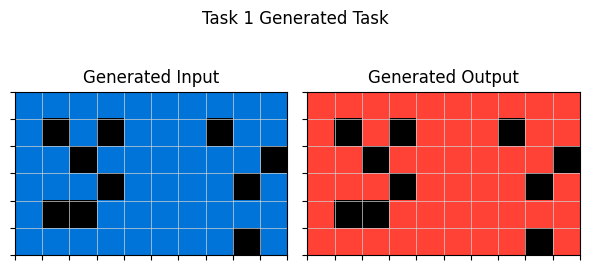

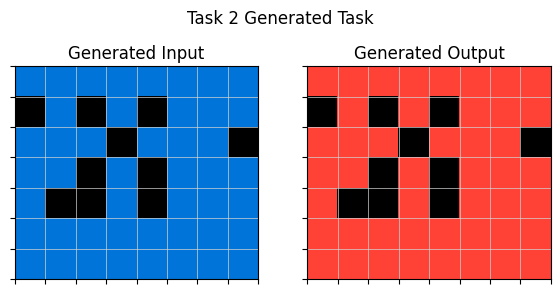

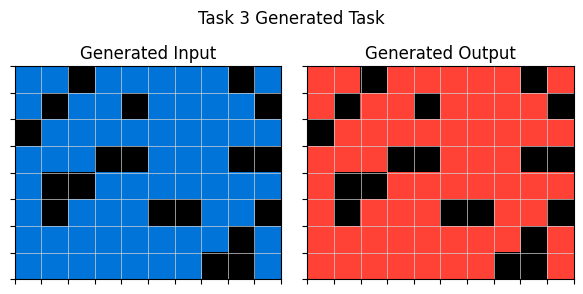

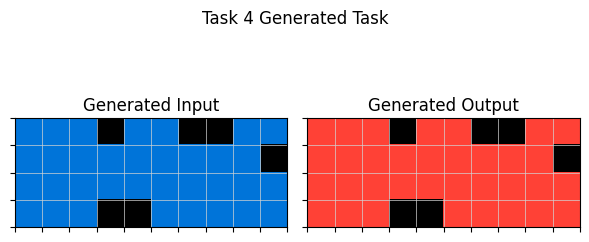

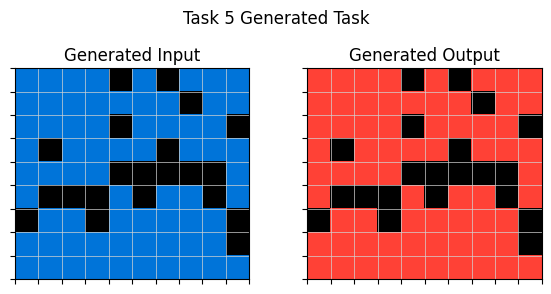

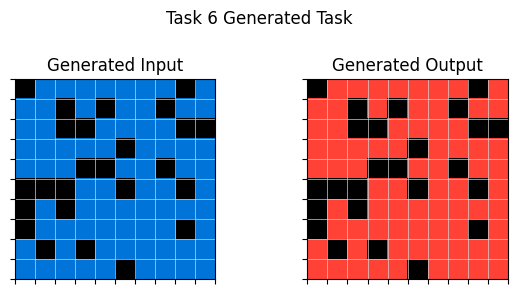

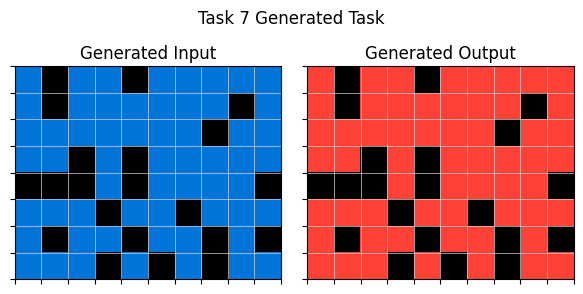

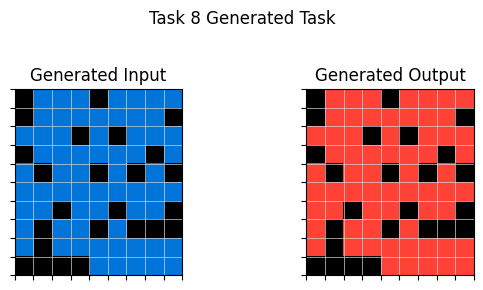

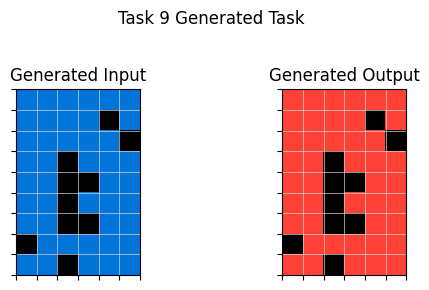

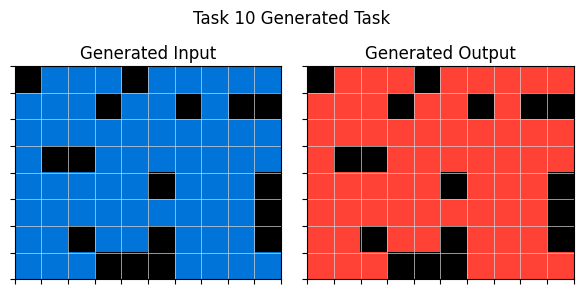

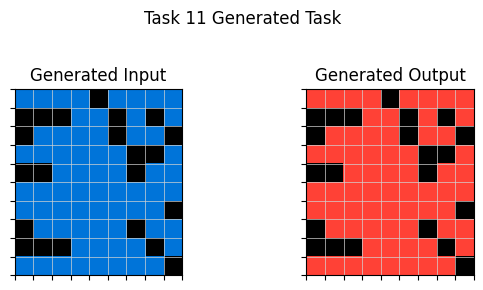

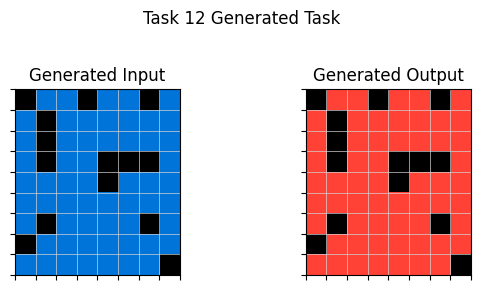

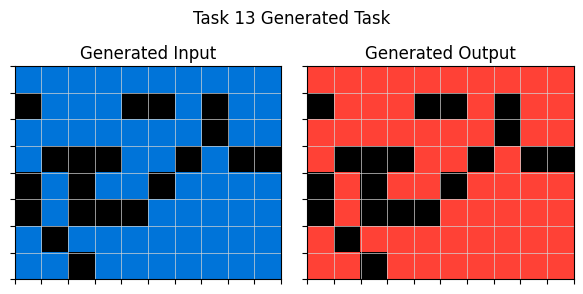

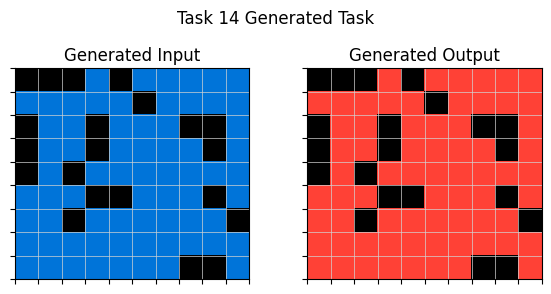

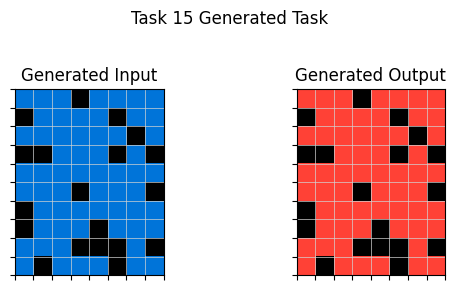

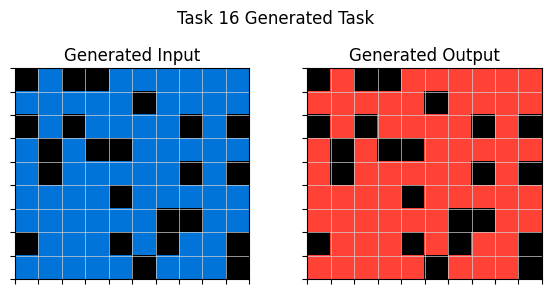

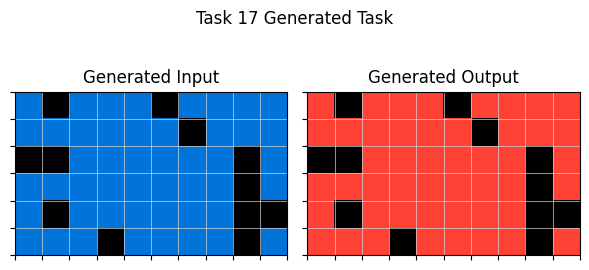

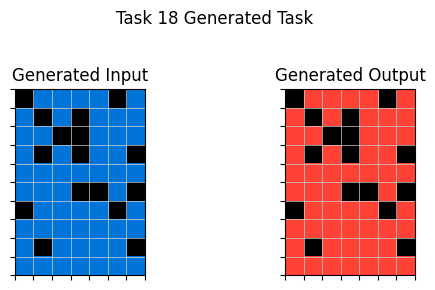

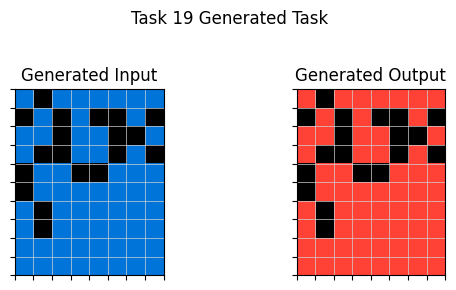

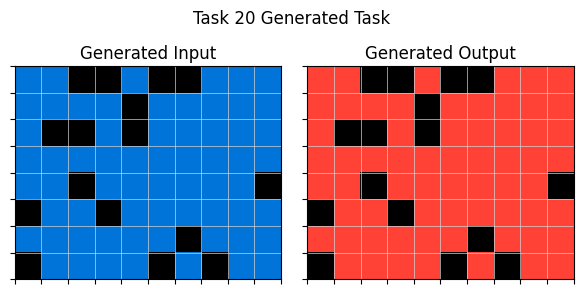

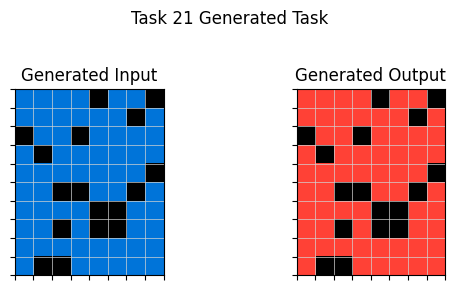

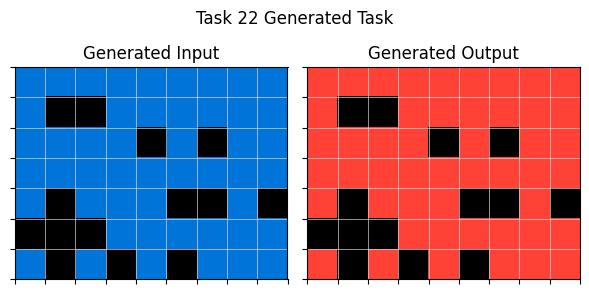

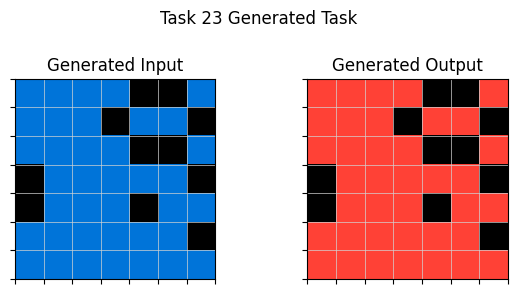

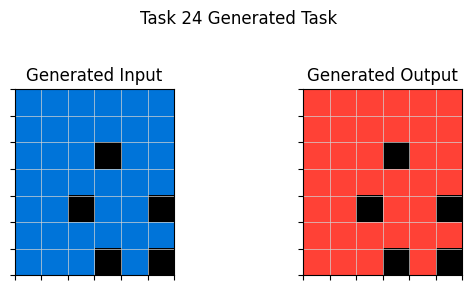

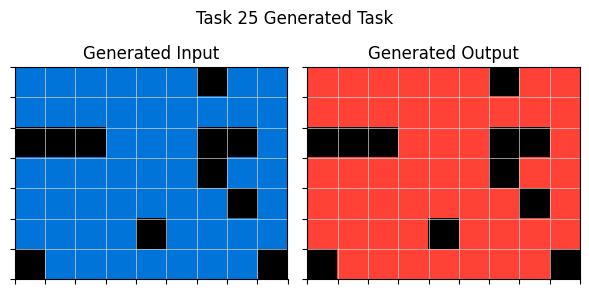

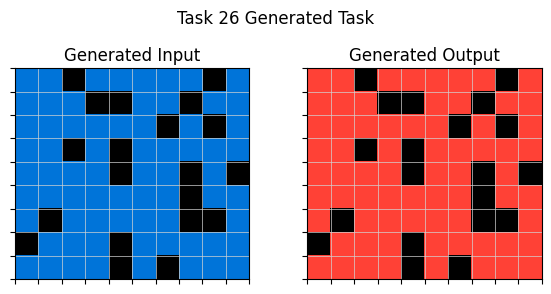

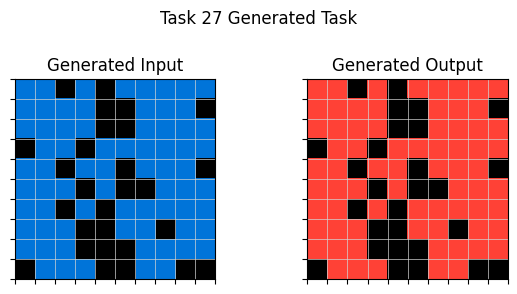

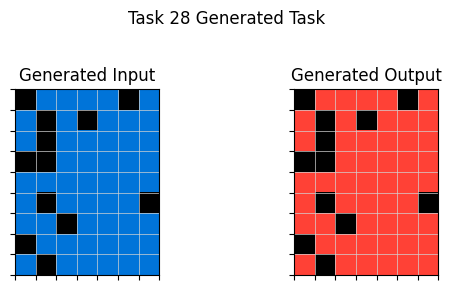

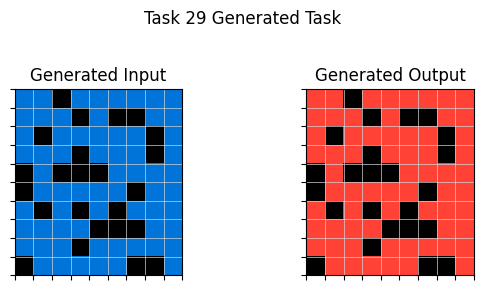

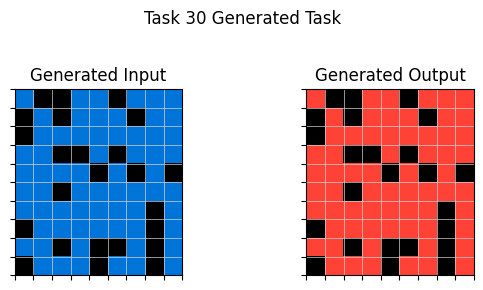

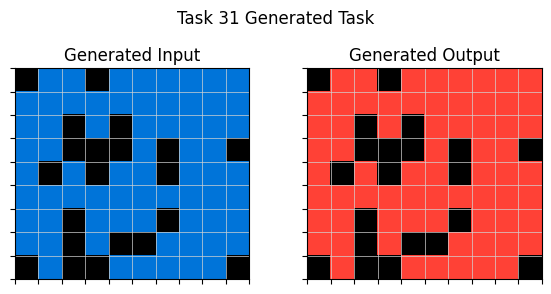

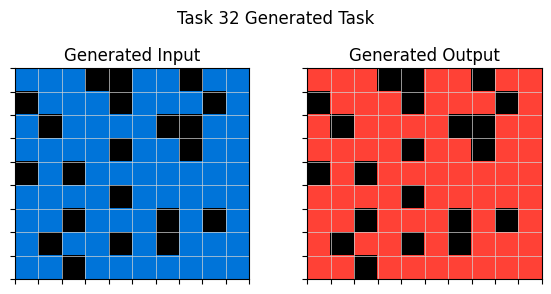

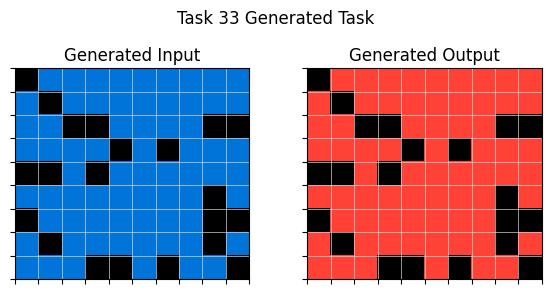

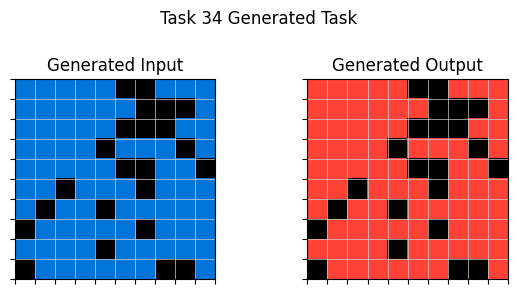

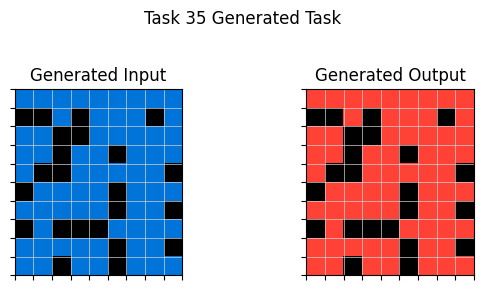

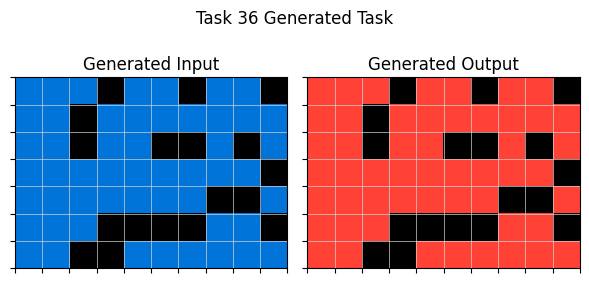

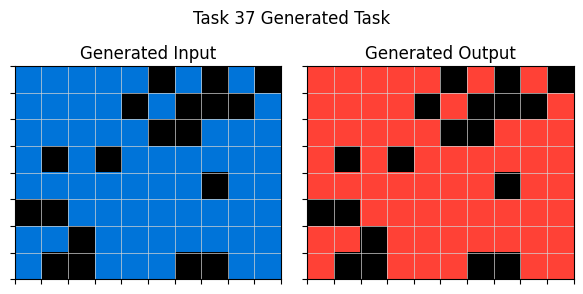

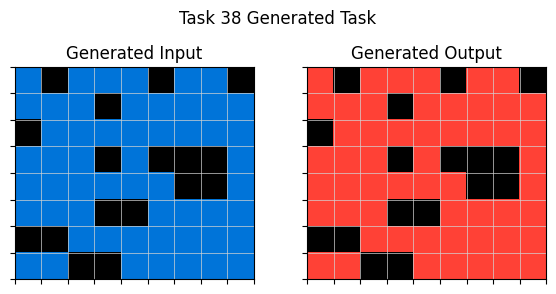

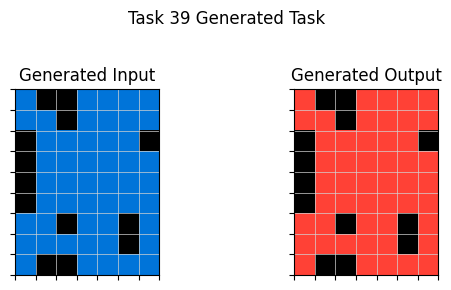

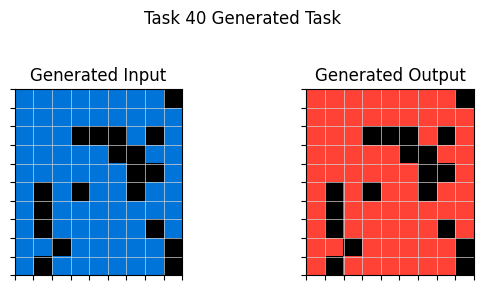

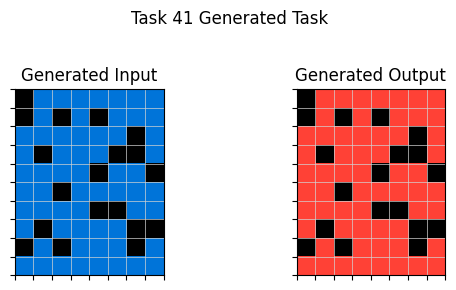

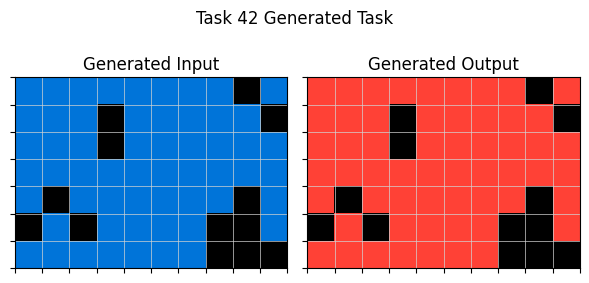

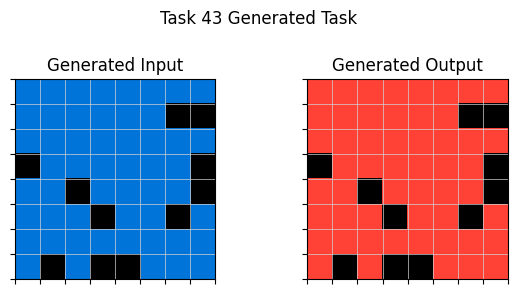

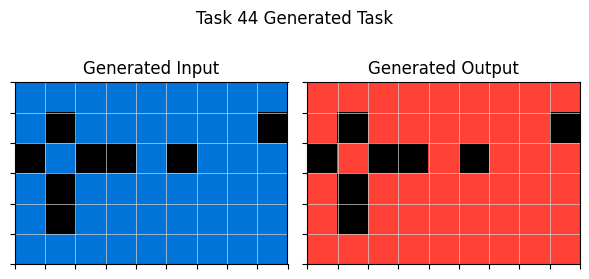

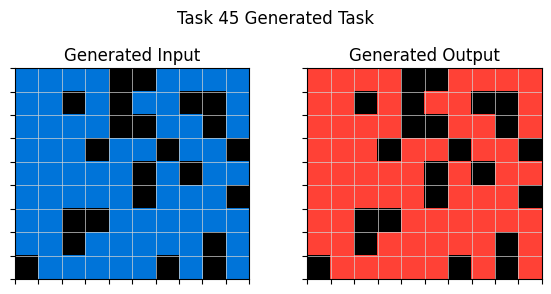

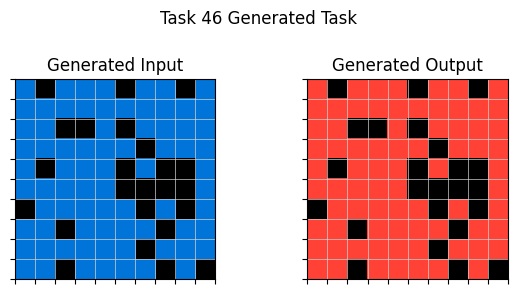

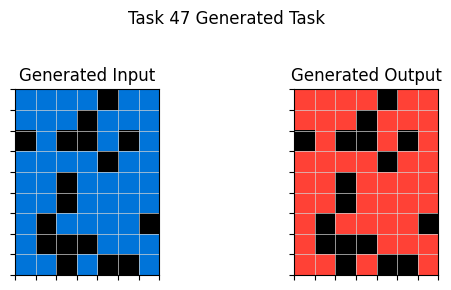

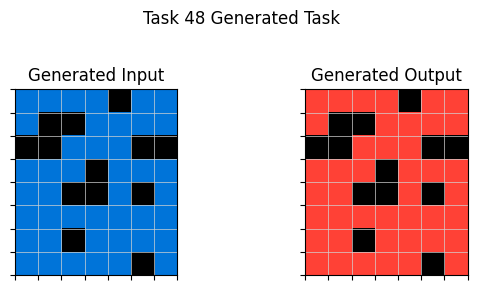

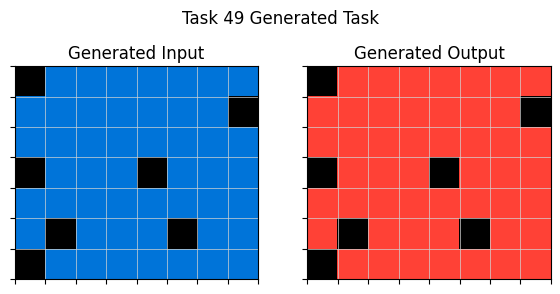

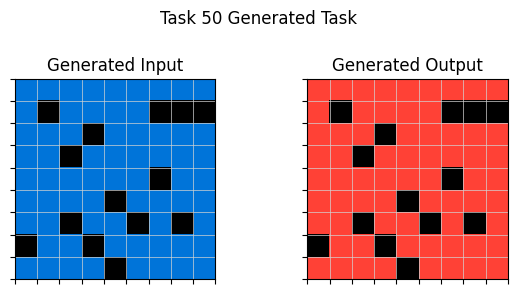

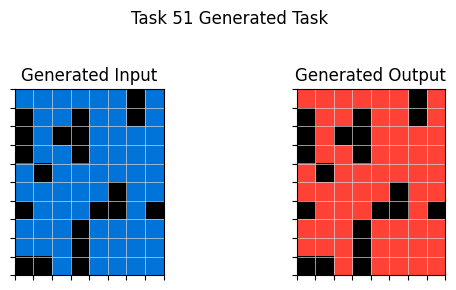

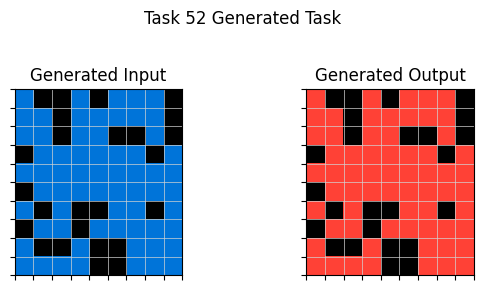

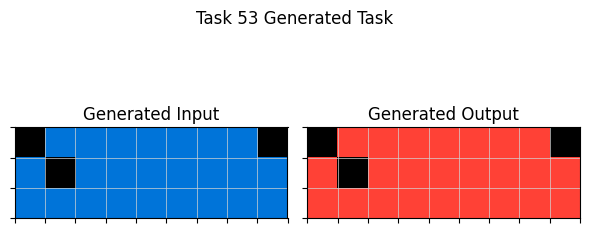

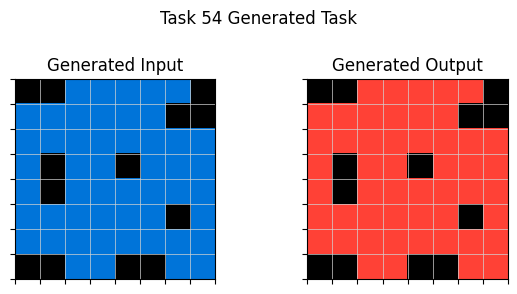

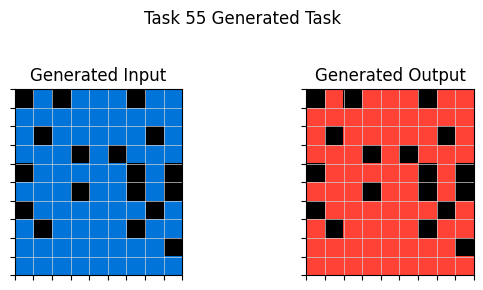

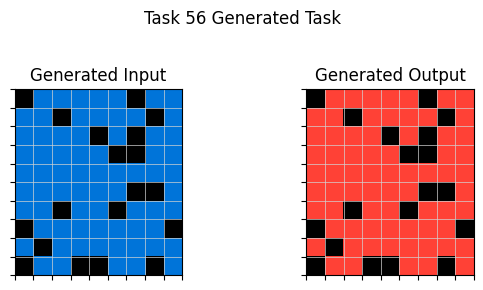

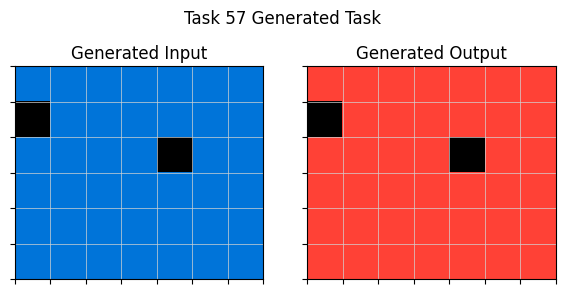

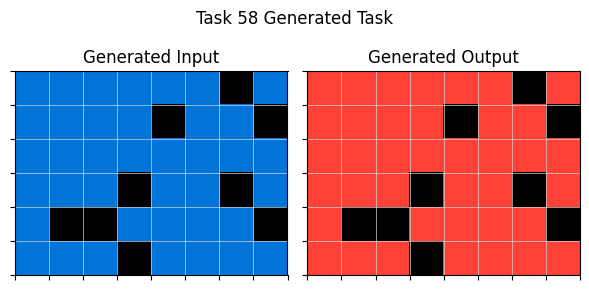

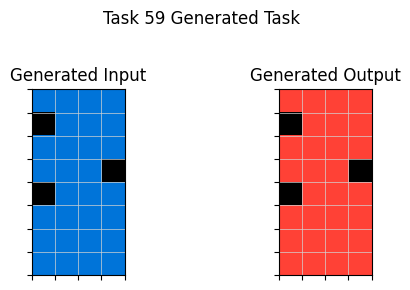

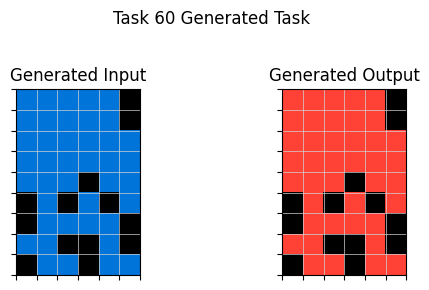

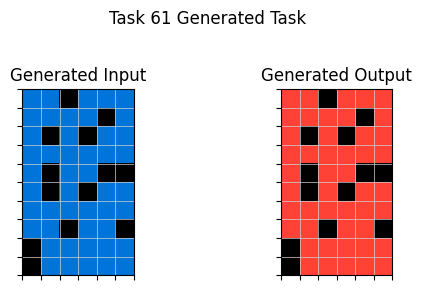

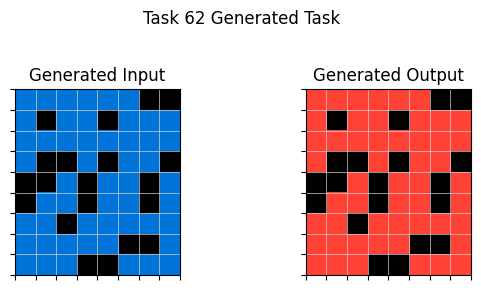

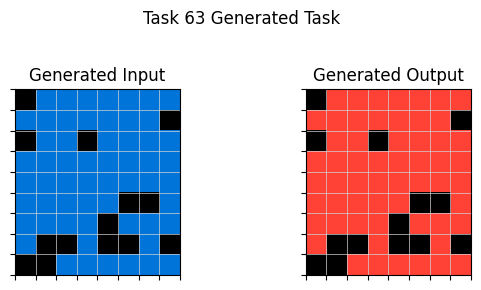

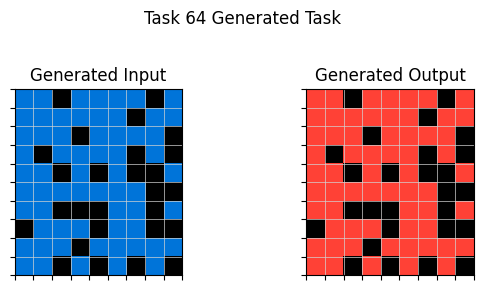

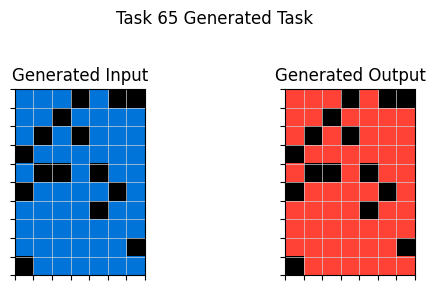

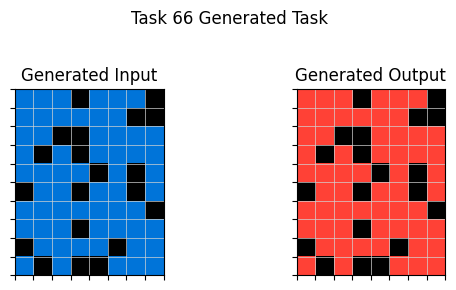

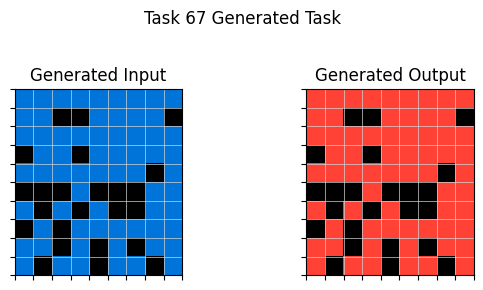

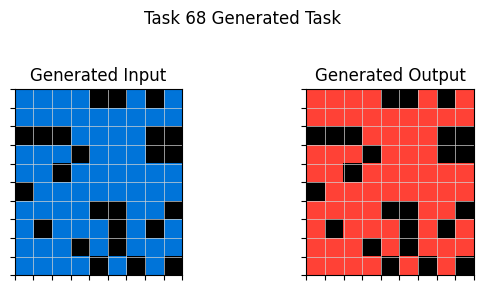

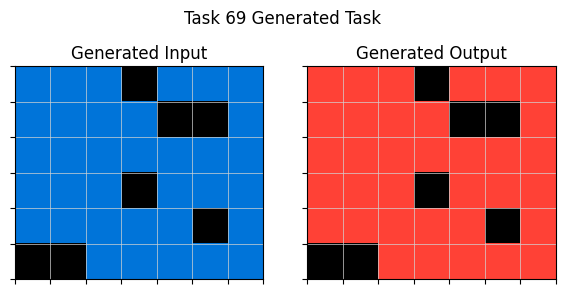

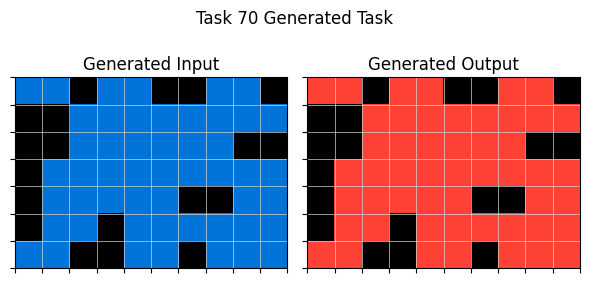

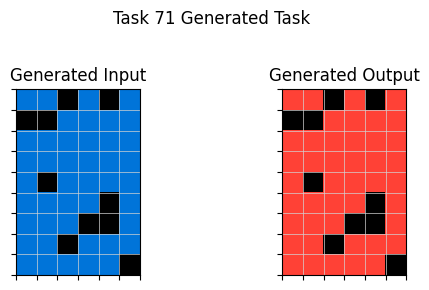

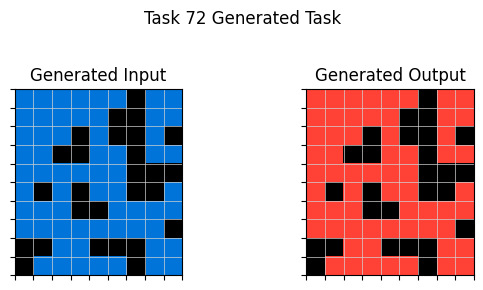

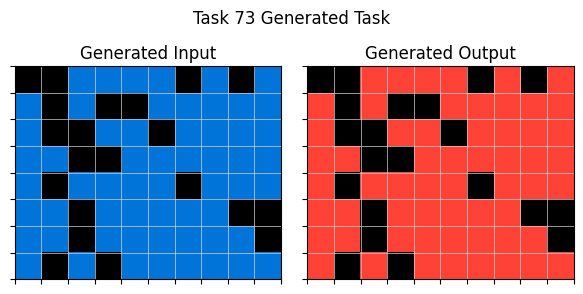

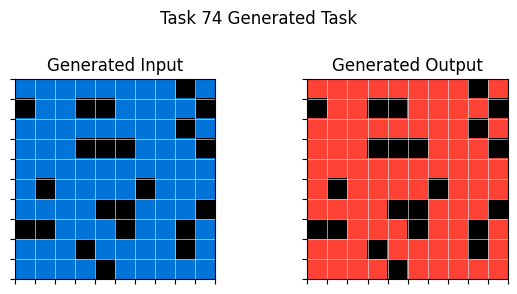

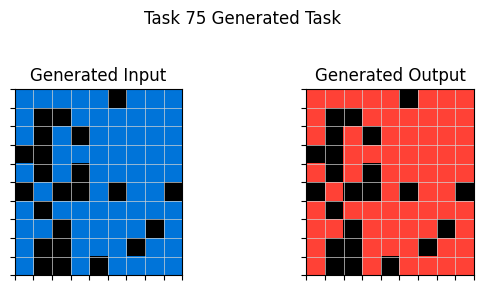

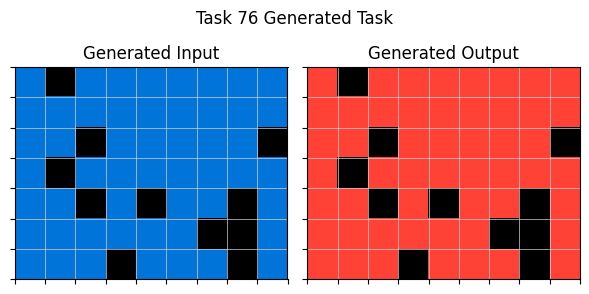

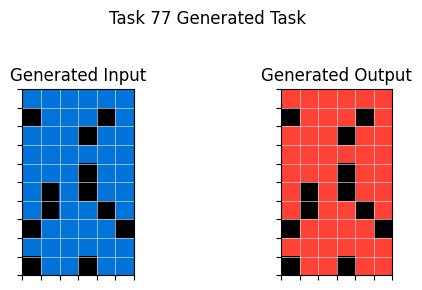

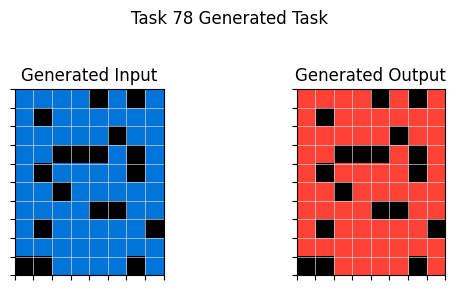

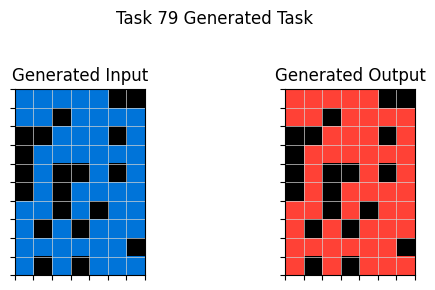

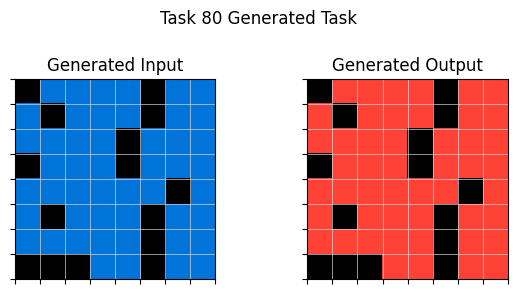

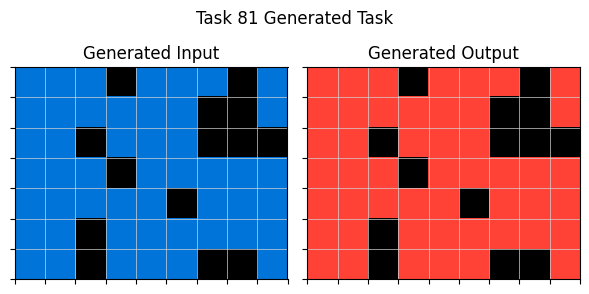

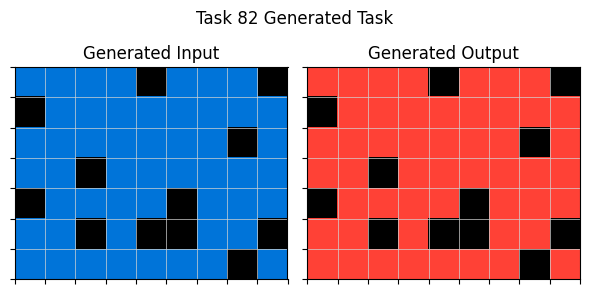

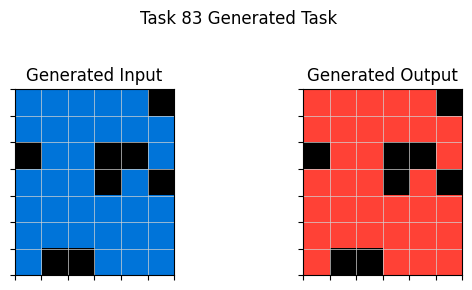

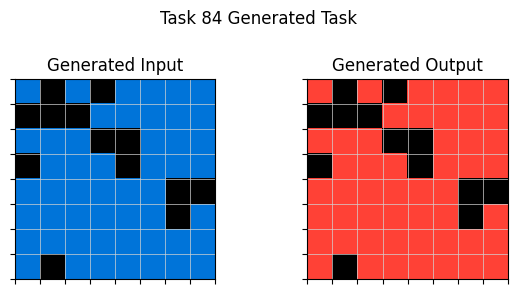

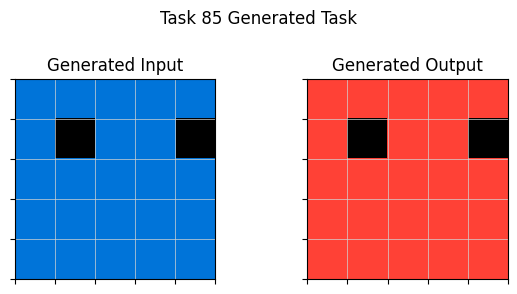

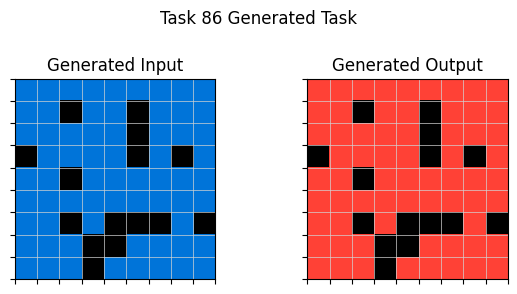

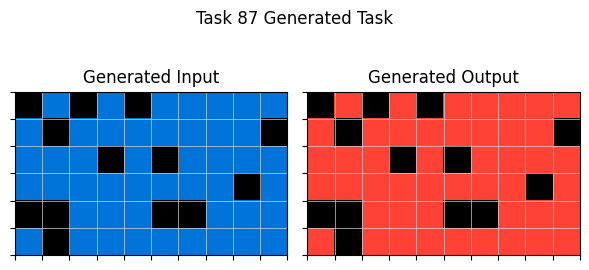

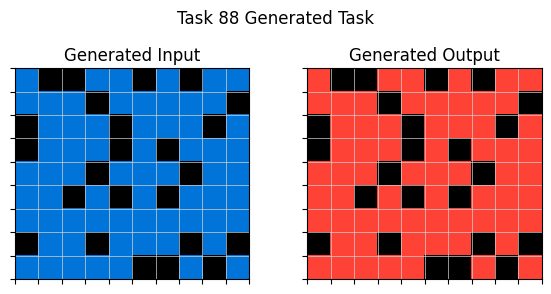

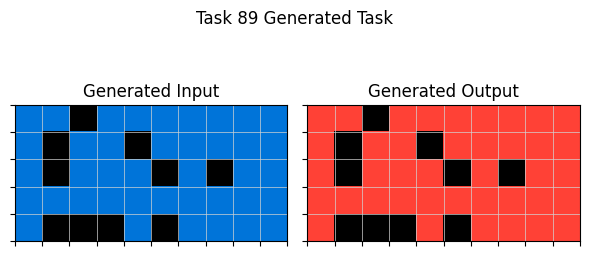

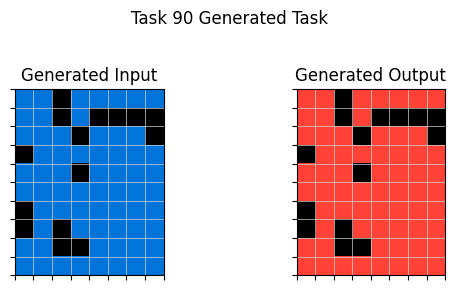

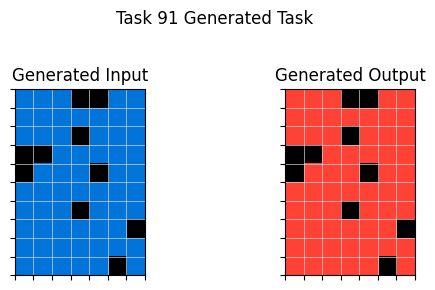

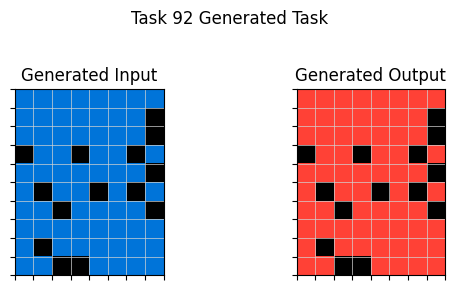

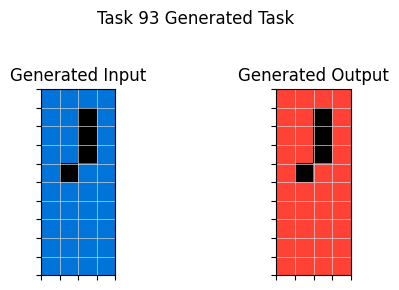

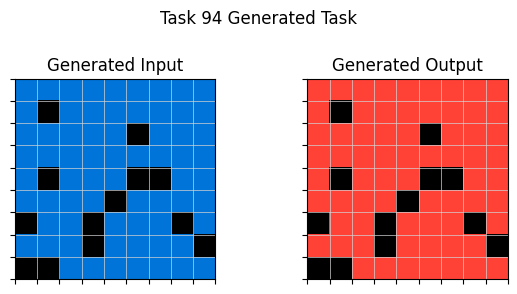

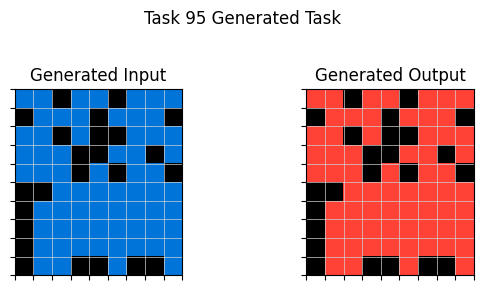

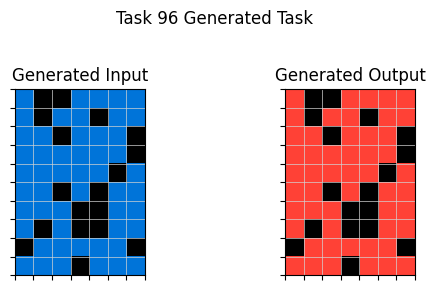

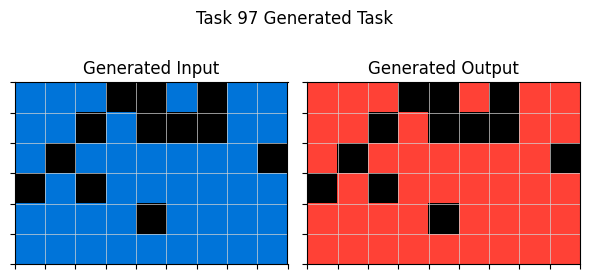

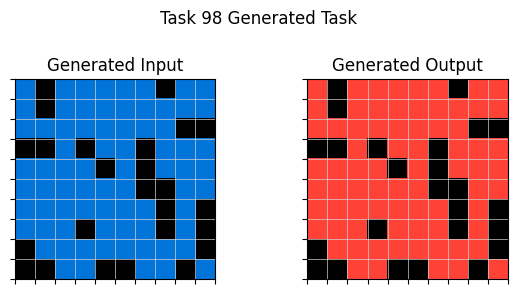

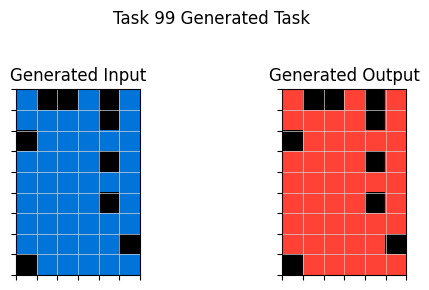

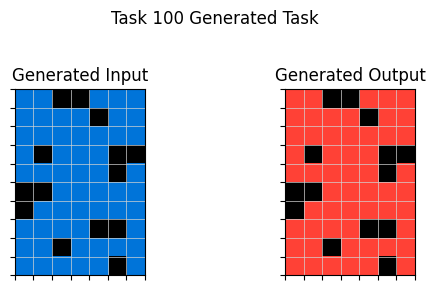

In [7]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Function to change color from old_color to new_color
def change_color(grid, old_color, new_color):
    new_grid = copy.deepcopy(grid)
    new_grid[grid == old_color] = new_color
    return new_grid

# Function to apply the color-changing rule
def apply_color_change_rule(input_grid, old_color=1, new_color=2):
    return change_color(input_grid, old_color, new_color)

# Transformation functions (rotation, flipping)
def rotate_90(grid):
    return np.rot90(grid)

def flip_horizontal(grid):
    return np.fliplr(grid)

def flip_vertical(grid):
    return np.flipud(grid)

# Generate the initial population of grids with random grid sizes and more black pixels
def generate_initial_population(num_individuals=10, min_size=2, max_size=10, black_pixel_prob=0.6):
    population = []
    for _ in range(num_individuals):
        rows = random.randint(min_size, max_size)
        cols = random.randint(min_size, max_size)
        # Introduce more black pixels (0) by controlling probability
        individual = {
            'input_grid': np.random.choice([0, 1], size=(rows, cols), p=[black_pixel_prob, 1-black_pixel_prob])
        }
        # Ensure each grid follows the color change rule
        individual['output_grid'] = apply_color_change_rule(individual['input_grid'])
        population.append(individual)
    return population

# Fitness function to encourage color changes
def fitness(individual):
    input_grid = individual['input_grid']
    expected_output = apply_color_change_rule(input_grid)
    
    # Count the number of correctly changed pixels (from 1 to 2)
    correctly_changed_pixels = np.sum((individual['output_grid'] == 2) & (input_grid == 1))
    
    # Reward the grids where more pixels were correctly changed
    fitness_score = correctly_changed_pixels * 10  # Reward correct transformations
    
    return fitness_score

# Select best individuals based on fitness
def select_best_individuals(population, num_best=5):
    sorted_population = sorted(population, key=lambda x: fitness(x), reverse=True)
    return sorted_population[:num_best]

# Crossover function to combine two parent grids
def crossover(parent1, parent2):
    rows1, cols1 = parent1['input_grid'].shape
    rows2, cols2 = parent2['input_grid'].shape
    
    # Crossover only if parents have the same grid size
    if rows1 == rows2 and cols1 == cols2:
        child_input = parent1['input_grid'].copy()
        crossover_point = random.randint(1, rows1 - 2)
        child_input[crossover_point:, :] = parent2['input_grid'][crossover_point:, :]
        child_output = apply_color_change_rule(child_input)
        return {'input_grid': child_input, 'output_grid': child_output}
    else:
        return random.choice([parent1, parent2])  # If sizes don't match, pick one parent

# Mutate the grid by randomly changing some pixels
def mutate(individual, mutation_rate=0.1):
    grid = individual['input_grid']
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if random.random() < mutation_rate:
                grid[i, j] = random.choice([0, 1])  # Change between black (0) and color (1)
    individual['output_grid'] = apply_color_change_rule(grid)
    return individual

# Main Genetic Algorithm Loop
def genetic_algorithm(num_generations=50, population_size=10, min_size=2, max_size=10, black_pixel_prob=0.6):
    population = generate_initial_population(population_size, min_size, max_size, black_pixel_prob)
    for generation in range(num_generations):
        best_individuals = select_best_individuals(population)
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(best_individuals, 2)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)
        population = new_population
    return select_best_individuals(population, num_best=1)[0]

# Visualization functions
def plot_one(ax, matrix, title):
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9', '#FF4136', '#2ECC40', '#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    
    ax.imshow(matrix, cmap=cmap, norm=norm)
    ax.grid(True, which='both', color='lightgrey', linewidth=0.5)
    ax.set_xticks([x - 0.5 for x in range(1 + len(matrix[0]))])
    ax.set_yticks([x - 0.5 for x in range(1 + len(matrix))])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title(title)

def plot_task(input_task, output_task, task_number):
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    fig.suptitle(f'{task_number} Generated Task')
    plot_one(axs[0], input_task, 'Generated Input')
    plot_one(axs[1], output_task, 'Generated Output')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Generate 20 new tasks with diverse grid sizes and visualize them
new_tasks = []
for i in range(100):  # Generate 20 tasks
    best_individual = genetic_algorithm(num_generations=50, population_size=10, min_size=2, max_size=10, black_pixel_prob=0.7)
    generated_input = best_individual['input_grid']
    generated_output = best_individual['output_grid']
    plot_task(generated_input, generated_output, f"Task {i + 1}")
    new_tasks.append((generated_input, generated_output))
